<a href="https://colab.research.google.com/github/mlaguna10/MLT_solutions/blob/master/Laboratorio_3_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Techniques - Laboratorio 3

> Mateo Laguna Guantiva

> Ramiro Vargas Salas




In [ ]:
import numpy as np
import datacompy, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as RandomizedPCA
import warnings
warnings.filterwarnings('ignore')

# 1. Comprension de los datos

In [ ]:
%%time
data_dict = pd.read_csv('https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%203/Punto%201/NUSW-NB15_diccionario.csv', sep=';', encoding='cp1252')
data_test = pd.read_csv('https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%203/Punto%201/UNSW_NB15_testing-set.csv', sep=',')
data_training = pd.read_csv('https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%203/Punto%201/UNSW_NB15_training-set.csv', sep=',')

CPU times: user 983 ms, sys: 207 ms, total: 1.19 s
Wall time: 3.16 s


In [ ]:
data_dict.shape

(49, 4)

In [ ]:
data_test.shape

(175341, 45)

In [ ]:
data_training.shape

(82332, 45)

In [ ]:
data_dict = data_dict[['Name','Type ','Description']]
data_dict

,Name,Type,Description
0,srcip,nominal,Source IP address
1,sport,integer,Source port number
2,dstip,nominal,Destination IP address
3,dsport,integer,Destination port number
4,proto,nominal,Transaction protocol
5,state,nominal,Indicates to the state and its dependent proto...
6,dur,Float,Record total duration
7,sbytes,Integer,Source to destination transaction bytes
8,dbytes,Integer,Destination to source transaction bytes
9,sttl,Integer,Source to destination time to live value


In [ ]:
list(data_dict.Description)

['Source IP address',
 'Source port number',
 'Destination IP address',
 'Destination port number',
 'Transaction protocol',
 'Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)',
 'Record total duration',
 'Source to destination transaction bytes ',
 'Destination to source transaction bytes',
 'Source to destination time to live value ',
 'Destination to source time to live value',
 'Source packets retransmitted or dropped ',
 'Destination packets retransmitted or dropped',
 'http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service',
 'Source bits per second',
 'Destination bits per second',
 'Source to destination packet count ',
 'Destination to source packet count',
 'Source TCP window advertisement value',
 'Destination TCP window advertisement value',
 'Source TCP base sequence number',
 'Destination TCP base sequence number',
 'Mean of the row packet size

In [ ]:
data_training['label'].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [ ]:
data_training.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
data_test.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
data_training.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

### Profiling Report

El profiling report se encuentra adjunto en formato HTML, no se carga en el notebook porque lo detiene.

In [ ]:
compare = datacompy.Compare(
    data_training,
    data_test,
    join_columns='id'
)
compare.matches(ignore_extra_columns=False)
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns    Rows
0       df1       45   82332
1       df2       45  175341

Column Summary
--------------

Number of columns in common: 45
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: id
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 82,332
Number of rows in df1 but not in df2: 0
Number of rows in df2 but not in df1: 93,009

Number of rows with some compared columns unequal: 82,332
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 44
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 2,441,923

Columns with Unequal Values or Types
------------------------------------

               Column df1 dtype df2 dtype  # Unequal      

## Se evidencia que:


1.  Hay columnas que estan en el diccionario que no están en los data sets (srcip,sport,dstip,dsport,Stime,Ltime) 
2.  Se corre pandas profiling solo en el dataset de entrenamiento ya que en el de test tarda demasido en ejecutarse.
3.  Se realiza el proceso de OneHotEncoder para la variable attack_cat para lograr transformar la variable nominal en una variable númerica que pueda entender el SVM.
4.  Se descartan variables de alta correlación o que contienen gran cantidad de ceros que no aportan a la maquina y sí la cargan de forma que no termina nunca el entrenamiento.

# 2. Preparación de los datos

In [ ]:
data_training['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

### Proceso de OneHotEncoder para la variable del tipo de ataque

In [ ]:
data_training['attack_cat'] = data_training['attack_cat'].astype(str)
data_training = pd.get_dummies(data_training, columns=['attack_cat'])
data_training

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,1,0,0,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0,0,0,0,0,0,0,1,0,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_test['attack_cat'] = data_test['attack_cat'].astype(str)
data_test=pd.get_dummies(data_test, columns=['attack_cat'])
data_test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0,0,0,0,0,0,0,1,0,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1,0,0,0,0,0,1,0,0,0,0
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1,0,0,0,0,0,1,0,0,0,0
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1,0,0,0,0,0,1,0,0,0,0


### Proceso de OneHotEncoder para las variables categóricas

In [ ]:
data_training['proto'] = data_training['proto'].astype(str)
data_training = pd.get_dummies(data_training, columns=['proto'])
data_training

,id,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,...,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero
0,1,0.000011,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.000008,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.000005,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.000006,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0.000010,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
82328,82329,1.106101,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82329,82330,0.000000,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82330,82331,0.000000,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test['proto'] = data_test['proto'].astype(str)
data_test = pd.get_dummies(data_test, columns=['proto'])
data_test

,id,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,...,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero
0,1,0.121478,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.649902,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1.623129,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1.681642,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0.449454,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
175337,175338,0.505762,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175338,175339,0.000009,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
175339,175340,0.000009,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_training['service'] = data_training['service'].astype(str)
data_training = pd.get_dummies(data_training, columns=['service'])
data_training

,id,dur,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,...,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,1,0.000011,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.000008,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.000005,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.000006,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0.000010,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
82328,82329,1.106101,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
82329,82330,0.000000,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
82330,82331,0.000000,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test['service'] = data_test['service'].astype(str)
data_test = pd.get_dummies(data_test, columns=['service'])
data_test

,id,dur,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,...,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,1,0.121478,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.649902,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1.623129,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1.681642,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,0.449454,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
175337,175338,0.505762,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
175338,175339,0.000009,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
175339,175340,0.000009,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_training['state'] = data_training['state'].astype(str)
data_training = pd.get_dummies(data_training, columns=['state'])
data_training

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,...,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82329,82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82330,82331,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_test['state'] = data_test['state'].astype(str)
data_test = pd.get_dummies(data_test, columns=['state'])
data_test

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,...,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Se descartan variables de alta correlacion o que contienen gran cantidad de ceros que no aportan a la máquina basados en el pandas profiling (estas variables sí cargan en tiempo de ejecución la SVM de forma que no termina nunca el entrenamiento). 

> dpkts, dbytes, dinpkt, swin, dwin, trans_depth, ct_flw_http_mthd


In [ ]:
data_training.drop(columns=['dpkts','dbytes','dinpkt','swin','dwin','trans_depth','ct_flw_http_mthd'], inplace=True)
data_training

,id,dur,spkts,sbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,...,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,2,496,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,248,0,0,2,2,1,1,1,2,0,0,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,2,1762,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,881,0,0,2,2,1,1,1,2,0,0,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0.000005,2,1068,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,534,0,0,3,2,1,1,1,3,0,0,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0.000006,2,900,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,450,0,0,3,2,2,2,1,3,0,0,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0.000010,2,2126,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,1063,0,0,3,2,2,2,1,3,0,0,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,104,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,52,0,0,1,2,2,1,1,2,0,0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82328,82329,1.106101,20,18062,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,4798.130981,190.980813,1072535109,3284291478,0.173208,0.100191,0.073017,903,44,0,1,1,2,1,1,1,0,0,3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82329,82330,0.000000,1,46,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,46,0,0,1,2,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82330,82331,0.000000,1,46,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,10.954518,0.000000,0,0,0.000000,0.000000,0.000000,46,0,0,1,2,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Se descartan variables que no afectan al resultado de la clasificación del modelo, estas fueron validadas por el clasificador de weka utilizando tecnica de Naive Bayes como modelo base. (El soporte se encuentra en la carpeta de imágenes)

In [ ]:
data_training.drop(columns=['dur','spkts','is_ftp_login','ct_ftp_cmd','is_sm_ips_ports'], inplace=True)
data_training

,id,sbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,proto_3pc,...,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,496,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,248,0,0,2,2,1,1,1,2,1,2,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1762,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,881,0,0,2,2,1,1,1,2,1,2,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1068,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,534,0,0,3,2,1,1,1,3,1,3,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,900,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,450,0,0,3,2,2,2,1,3,2,3,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2126,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,1063,0,0,3,2,2,2,1,3,2,3,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,104,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,52,0,0,1,2,2,1,1,2,2,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82328,82329,18062,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,4798.130981,190.980813,1072535109,3284291478,0.173208,0.100191,0.073017,903,44,0,1,1,2,1,1,1,3,2,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82329,82330,46,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,46,0,0,1,2,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82330,82331,46,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,10.954518,0.000000,0,0,0.000000,0.000000,0.000000,46,0,0,1,2,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_test.drop(columns=['dpkts','dbytes','dinpkt','swin','dwin','trans_depth','ct_flw_http_mthd','dur','spkts','is_ftp_login','ct_ftp_cmd','is_sm_ips_ports'], inplace=True)
data_test

,id,sbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,proto_3pc,...,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,258,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,30.177547,11.830604,621772692,2202533631,0.000000,0.000000,0.000000,43,43,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,734,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,61.426934,1387.778330,1417884146,3077387971,0.000000,0.000000,0.000000,52,1106,0,43,1,1,1,1,2,1,6,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,364,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,17179.586860,11420.926230,2116150707,2963114973,0.111897,0.061458,0.050439,46,824,0,7,1,2,1,1,3,2,6,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,628,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,259.080172,4991.784669,1107119177,1047442890,0.000000,0.000000,0.000000,52,64,0,1,1,2,1,1,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,534,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,2415.837634,115.807000,2436137549,1977154190,0.128381,0.071147,0.057234,53,45,0,43,1,2,2,1,40,2,39,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,114,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,57,0,0,24,2,24,24,13,24,24,24,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
175337,175338,620,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,3721.068786,120.177727,3518776216,3453092386,0.099440,0.036895,0.062545,62,44,0,1,1,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
175338,175339,114,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,57,0,0,12,2,3,3,3,13,3,12,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
175339,175340,114,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,57,0,0,30,2,30,30,14,30,30,30,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
list1 = data_training.columns
list2 = data_test.columns
a = []

for i in list2:
  if i not in list1:
    a.append(i)

a

['proto_icmp', 'proto_rtp', 'state_ECO', 'state_PAR', 'state_URN', 'state_no']

In [ ]:
data_test.drop(columns=a, inplace=True)
data_test

,id,sbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,proto_3pc,...,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,258,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,30.177547,11.830604,621772692,2202533631,0.000000,0.000000,0.000000,43,43,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,734,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,61.426934,1387.778330,1417884146,3077387971,0.000000,0.000000,0.000000,52,1106,0,43,1,1,1,1,2,1,6,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,364,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,17179.586860,11420.926230,2116150707,2963114973,0.111897,0.061458,0.050439,46,824,0,7,1,2,1,1,3,2,6,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,628,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,259.080172,4991.784669,1107119177,1047442890,0.000000,0.000000,0.000000,52,64,0,1,1,2,1,1,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,534,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,2415.837634,115.807000,2436137549,1977154190,0.128381,0.071147,0.057234,53,45,0,43,1,2,2,1,40,2,39,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,114,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,57,0,0,24,2,24,24,13,24,24,24,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175337,175338,620,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,3721.068786,120.177727,3518776216,3453092386,0.099440,0.036895,0.062545,62,44,0,1,1,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
175338,175339,114,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,57,0,0,12,2,3,3,3,13,3,12,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175339,175340,114,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,57,0,0,30,2,30,30,14,30,30,30,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
list1 = data_training.columns
list2 = data_test.columns
a = []

for i in list1:
  if i not in list2:
    a.append(i)

a

['state_ACC', 'state_CLO']

In [ ]:
data_training.columns.get_loc('state_ACC')

183

In [ ]:
print(data_training.columns[182])
print(data_training.columns[183])
print(data_training.columns[184])
print(data_training.columns[185])

service_ssl
state_ACC
state_CLO
state_CON


In [ ]:
print(data_test.columns[183])

state_CON


Así como aparecieron nuevos tipos de protocolo, o estados, en el conjunto de test, también faltaron ciertos tipos que sí están en el conjunto de training, ya que las máquinas se entrenarán con un número de atributos específicos, toca añadir estas columnas con ceros, pues se sabe que este protocolo nunca se llevo a cabo en test, pues no existían.

In [ ]:
z = np.zeros(175341)
data_test.insert(loc=183,column='state_ACC',value=z)

In [ ]:
print(data_test.columns[183])

state_ACC


In [ ]:
data_test.insert(loc=184,column='state_CLO',value=z)

In [ ]:
print(data_test.columns[184])

state_CLO


In [ ]:
data_training.columns.shape == data_test.columns.shape

True

# 3. Modelamiento

## División de los conjuntos de datos (entrenamiento y validación)

In [ ]:
data_training.columns

Index(['id', 'sbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss',
       'dloss', 'sinpkt',
       ...
       'service_snmp', 'service_ssh', 'service_ssl', 'state_ACC', 'state_CLO',
       'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST'],
      dtype='object', length=190)

In [ ]:
data_training.dtypes.value_counts()

uint8      161
int64       20
float64      9
dtype: int64

In [ ]:
pca = RandomizedPCA(n_components=10, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Se intentó entrenar la SVM con todas las columnas tentiendo como columna objetivo el tipo de ataque, sin embargo, nunca terminó. Entonces se opto por entrenar una SVM por cada tipo de ataque para que diga si es o no un ataque de ese tipo y se usarán los diferentes modelos para predecir qué tipo de ataque es.

### Normal attack

In [ ]:
X = data_training.drop(columns=['attack_cat_Normal','attack_cat_Generic','attack_cat_Exploits', 'attack_cat_Fuzzers','attack_cat_DoS','attack_cat_Reconnaissance','attack_cat_Analysis','attack_cat_Backdoor','attack_cat_Shellcode','attack_cat_Worms','id'])

In [ ]:
columns = X.columns

In [ ]:
pipeline_cleaning = Pipeline([
 ('normalization', MinMaxScaler(feature_range=(0, 1))),
 ])

In [ ]:
X = pipeline_cleaning.fit_transform(X)

In [ ]:
X = pd.DataFrame(X,columns=columns)
X

,sbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,...,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000033,0.090909,0.996078,0.000000,0.034238,0.000000,0.000000,0.000000,1.833028e-07,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.151351,0.000000,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.016129,0.000000,0.016393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000121,0.125000,0.996078,0.000000,0.167236,0.000000,0.000000,0.000000,1.333111e-07,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.579054,0.000000,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.016129,0.000000,0.016393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000073,0.200000,0.996078,0.000000,0.162187,0.000000,0.000000,0.000000,8.331946e-08,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.344595,0.000000,0.0,0.032258,0.333333,0.000000,0.000000,0.0,0.032258,0.000000,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000061,0.166667,0.996078,0.000000,0.113895,0.000000,0.000000,0.000000,9.998335e-08,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.287838,0.000000,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.032258,0.016949,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000146,0.100000,0.996078,0.000000,0.161427,0.000000,0.000000,0.000000,1.666389e-07,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.702027,0.000000,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.032258,0.016949,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000006,0.200000,0.996078,0.000000,0.015793,0.000000,0.000000,0.000000,8.331946e-08,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.018919,0.000000,0.0,0.000000,0.333333,0.017241,0.000000,0.0,0.016129,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
82328,0.001257,0.000024,0.996078,0.996047,0.000024,0.000108,0.001316,0.000182,9.311791e-04,0.00323

In [ ]:
Y = data_training[['attack_cat_Normal']]
Y

,attack_cat_Normal
0,1
1,1
2,1
3,1
4,1
...,...
82327,1
82328,1
82329,1
82330,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

## Entonación de los parámetros del modelo

In [ ]:
%%time 
param_grid = {'svc__C': [1, 5, 20],
             'svc__gamma': [0.0001, 0.001, 0.01]}

grid_normal = GridSearchCV(model, param_grid)
grid_normal.fit(X_train, y_train)
print(grid_normal.best_params_)

{'svc__C': 1, 'svc__gamma': 0.0001}
CPU times: user 5min 28s, sys: 15.7 s, total: 5min 44s
Wall time: 5min 6s


In [ ]:
%%time 
model_normal = grid_normal.best_estimator_
yfit = model_normal.predict(X_test)

CPU times: user 4.1 s, sys: 98.7 ms, total: 4.2 s
Wall time: 4.08 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11332
           1       1.00      1.00      1.00      9251

    accuracy                           1.00     20583
   macro avg       1.00      1.00      1.00     20583
weighted avg       1.00      1.00      1.00     20583



Text(91.68, 0.5, 'predicted label')

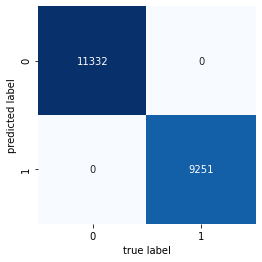

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Según la matriz de confusión, todos los ataques del tipo normal (9251) fueron clasificados como tal, y los que no eran de este tipo, fueron clasificados correctamente como verdaderos negativos. Podría parecer que el modelo está sobre ajustándose a los datos, sin embargo, el parámetro $\gamma$ funciona como un parámetro de regularización donde al disminuir, aumenta la restricción de modelos más complejos y para nuestro caso el mejor $\gamma$ dado por el grid search fue de 0.0001.

### Generic attack

In [ ]:
Y = data_training[['attack_cat_Generic']]
Y

,attack_cat_Generic
0,0
1,0
2,0
3,0
4,0
...,...
82327,0
82328,0
82329,0
82330,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
grid_generic = GridSearchCV(model, param_grid)
grid_generic.fit(X_train, y_train)
print(grid_generic.best_params_)

{'svc__C': 20, 'svc__gamma': 0.01}
CPU times: user 15min 16s, sys: 15.6 s, total: 15min 32s
Wall time: 14min 55s


In [ ]:
%%time 
model_generic = grid_generic.best_estimator_
yfit = model_generic.predict(X_test)

CPU times: user 1.9 s, sys: 94.9 ms, total: 1.99 s
Wall time: 1.87 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15888
           1       1.00      0.96      0.98      4695

    accuracy                           0.99     20583
   macro avg       0.99      0.98      0.99     20583
weighted avg       0.99      0.99      0.99     20583



Text(91.68, 0.5, 'predicted label')

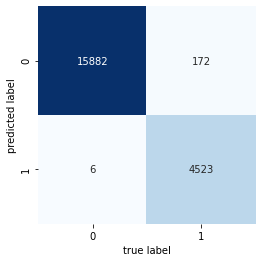

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Bueno, esta vez no clasificó todas las instancias correctamente, pero vemos que sobre la totalidad de muestras, los falsos positivas y falsos negativos son muy pequeños en comparación con las clases correctamente predichas. 

### Exploits Attack

In [ ]:
Y = data_training[['attack_cat_Exploits']]
Y

,attack_cat_Exploits
0,0
1,0
2,0
3,0
4,0
...,...
82327,0
82328,0
82329,0
82330,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
grid_exploits = GridSearchCV(model, param_grid)
grid_exploits.fit(X_train, y_train)
print(grid_exploits.best_params_)

{'svc__C': 20, 'svc__gamma': 0.01}
CPU times: user 38min 1s, sys: 16.8 s, total: 38min 18s
Wall time: 37min 42s


In [ ]:
%%time 
model_exploits = grid_exploits.best_estimator_
yfit = model_exploits.predict(X_test)

CPU times: user 8.8 s, sys: 101 ms, total: 8.9 s
Wall time: 8.79 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90     17755
           1       0.48      0.98      0.64      2828

    accuracy                           0.85     20583
   macro avg       0.74      0.91      0.77     20583
weighted avg       0.93      0.85      0.87     20583



Text(91.68, 0.5, 'predicted label')

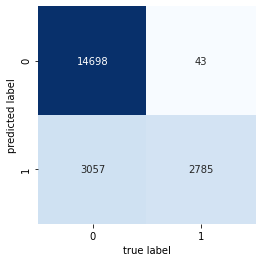

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Para el caso de los ataques de la clase *exploits* podemos ver que el algoritmo tiene problemas para clasificar los falsos poisitivos, pues hay 3057 casos donde no hay ataque pero el algoritmo precide que sí lo hay. A pesar de tener una precisión no tan alta, su recall es bastante bueno, es decir, la mayoría de los ataques de este tipo fueron clasificados.

### Fuzzers Attack

In [ ]:
Y = data_training[['attack_cat_Fuzzers']]
Y

,attack_cat_Fuzzers
0,0
1,0
2,0
3,0
4,0
...,...
82327,0
82328,0
82329,0
82330,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
grid_fuzzers = GridSearchCV(model, param_grid)
grid_fuzzers.fit(X_train, y_train)
print(grid_fuzzers.best_params_)

{'svc__C': 20, 'svc__gamma': 0.01}
CPU times: user 38min 39s, sys: 16.8 s, total: 38min 55s
Wall time: 38min 20s


In [ ]:
%%time 
model_fuzzers = grid_fuzzers.best_estimator_
yfit = model_fuzzers.predict(X_test)

CPU times: user 8.58 s, sys: 106 ms, total: 8.68 s
Wall time: 8.56 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     19068
           1       0.30      1.00      0.46      1515

    accuracy                           0.83     20583
   macro avg       0.65      0.91      0.68     20583
weighted avg       0.95      0.83      0.86     20583



Text(91.68, 0.5, 'predicted label')

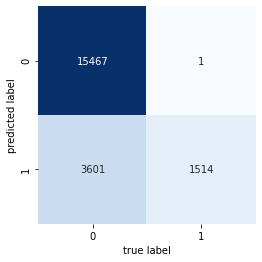

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Podemos ver que a medida que nos adentramos en tipos de ataque con menor número de instancias en el dataset, la precisión disminuye, pero al ser un trade-off, el recall aumenta. Puedo clasificar casi todos (excepto por uno) los ataques del tipo *fuzzers*, pero también clasifico como ataques muchos que no lo son (3601). 

### DoS Attack

In [ ]:
Y = data_training[['attack_cat_DoS']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
param_grid = {'svc__C': [1, 5, 20],
             'svc__gamma': [0.0001, 0.001, 0.01]}

grid_dos = GridSearchCV(model, param_grid)
grid_dos.fit(X_train, y_train)
print(grid_dos.best_params_)

{'svc__C': 5, 'svc__gamma': 0.01}
CPU times: user 45min 47s, sys: 17 s, total: 46min 4s
Wall time: 45min 29s


In [ ]:
%%time 
model_dos = grid_dos.best_estimator_
yfit = model_dos.predict(X_test)

CPU times: user 12.2 s, sys: 97.9 ms, total: 12.3 s
Wall time: 12.2 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92     19598
           1       0.23      0.90      0.37       985

    accuracy                           0.85     20583
   macro avg       0.61      0.88      0.64     20583
weighted avg       0.96      0.85      0.89     20583



Text(91.68, 0.5, 'predicted label')

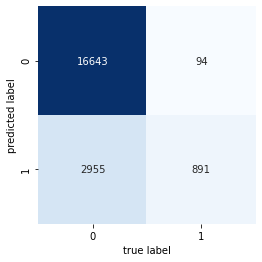

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Reconnaissance Attack

In [ ]:
Y = data_training[['attack_cat_Reconnaissance']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
param_grid = {'svc__C': [1, 5, 20],
             'svc__gamma': [0.0001, 0.001, 0.01]}

grid_reconnaissance = GridSearchCV(model, param_grid)
grid_reconnaissance.fit(X_train, y_train)
print(grid_reconnaissance.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}
CPU times: user 37min 52s, sys: 16.5 s, total: 38min 8s
Wall time: 37min 33s


In [ ]:
%%time 
model_reconnaissance = grid_reconnaissance.best_estimator_
yfit = model_reconnaissance.predict(X_test)

CPU times: user 9.62 s, sys: 92 ms, total: 9.72 s
Wall time: 9.6 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     19695
           1       0.27      0.89      0.42       888

    accuracy                           0.89     20583
   macro avg       0.63      0.89      0.68     20583
weighted avg       0.96      0.89      0.92     20583



Text(91.68, 0.5, 'predicted label')

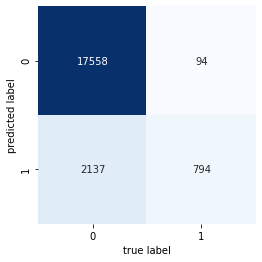

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Analysis Attack

In [ ]:
Y = data_training[['attack_cat_Analysis']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
param_grid = {'svc__C': [1, 5, 20],
             'svc__gamma': [0.0001, 0.001, 0.01]}

grid_analysis = GridSearchCV(model, param_grid)
grid_analysis.fit(X_train, y_train)
print(grid_analysis.best_params_)

{'svc__C': 20, 'svc__gamma': 0.01}
CPU times: user 24min 23s, sys: 15.7 s, total: 24min 39s
Wall time: 24min 3s


In [ ]:
%%time 
model_analysis = grid_analysis.best_estimator_
yfit = model_analysis.predict(X_test)

CPU times: user 5.22 s, sys: 103 ms, total: 5.32 s
Wall time: 5.21 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     20420
           1       0.07      0.99      0.13       163

    accuracy                           0.89     20583
   macro avg       0.53      0.94      0.53     20583
weighted avg       0.99      0.89      0.94     20583



Text(91.68, 0.5, 'predicted label')

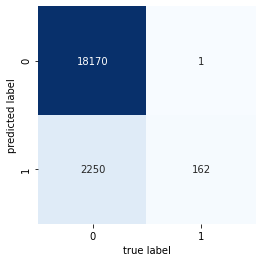

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Backdoor Attacks

In [ ]:
Y = data_training[['attack_cat_Backdoor']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
param_grid = {'svc__C': [1, 5, 20],
             'svc__gamma': [0.0001, 0.001, 0.01]}

grid_backdoor = GridSearchCV(model, param_grid)
grid_backdoor.fit(X_train, y_train)
print(grid_backdoor.best_params_)

{'svc__C': 5, 'svc__gamma': 0.01}
CPU times: user 34min 15s, sys: 16.2 s, total: 34min 31s
Wall time: 33min 56s


In [ ]:
%%time 
model_backdoor = grid_backdoor.best_estimator_
yfit = model_backdoor.predict(X_test)

CPU times: user 8.49 s, sys: 101 ms, total: 8.59 s
Wall time: 8.48 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20430
           1       0.06      0.91      0.12       153

    accuracy                           0.90     20583
   macro avg       0.53      0.90      0.53     20583
weighted avg       0.99      0.90      0.94     20583



Text(91.68, 0.5, 'predicted label')

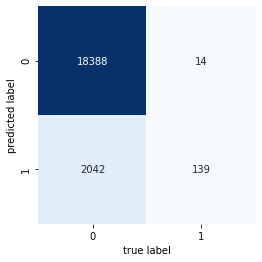

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Shellcode Attacks

In [ ]:
Y = data_training[['attack_cat_Shellcode']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time 
param_grid = {'svc__C': [1, 5, 20],
             'svc__gamma': [0.0001, 0.001, 0.01]}

grid_shellcode = GridSearchCV(model, param_grid)
grid_shellcode.fit(X_train, y_train)
print(grid_shellcode.best_params_)

{'svc__C': 20, 'svc__gamma': 0.01}
CPU times: user 19min 59s, sys: 15.8 s, total: 20min 14s
Wall time: 19min 38s


In [ ]:
%%time 
model_shellcode = grid_shellcode.best_estimator_
yfit = model_shellcode.predict(X_test)

CPU times: user 4.77 s, sys: 77 ms, total: 4.85 s
Wall time: 4.77 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     20488
           1       0.04      1.00      0.08        95

    accuracy                           0.89     20583
   macro avg       0.52      0.95      0.51     20583
weighted avg       1.00      0.89      0.94     20583



Text(91.68, 0.5, 'predicted label')

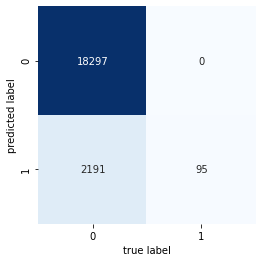

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Worms Attacks

In [ ]:
Y = data_training[['attack_cat_Worms']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
%%time

grid_worms = GridSearchCV(model, param_grid)
grid_worms.fit(X_train, y_train)
print(grid_worms.best_params_)

{'svc__C': 20, 'svc__gamma': 0.01}
CPU times: user 19min 28s, sys: 15.7 s, total: 19min 44s
Wall time: 19min 7s


In [ ]:
%%time 
model_worms = grid_worms.best_estimator_
yfit = model_worms.predict(X_test)

CPU times: user 4.23 s, sys: 98 ms, total: 4.33 s
Wall time: 4.21 s


In [ ]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20573
           1       0.01      0.80      0.01        10

    accuracy                           0.92     20583
   macro avg       0.50      0.86      0.49     20583
weighted avg       1.00      0.92      0.96     20583



Text(91.68, 0.5, 'predicted label')

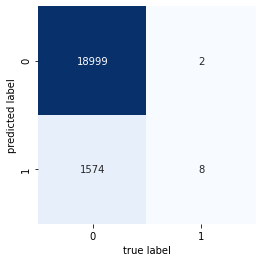

In [ ]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# 4. Validación

### Normal attacks prediction in test set

In [ ]:
real_data = data_test.drop(columns=['attack_cat_Normal','attack_cat_Generic','attack_cat_Exploits', 'attack_cat_Fuzzers','attack_cat_DoS','attack_cat_Reconnaissance','attack_cat_Analysis','attack_cat_Backdoor','attack_cat_Shellcode','attack_cat_Worms','id'])
columns = real_data.columns
pipeline_cleaning = Pipeline([
 ('normalization', MinMaxScaler(feature_range=(0, 1))),
 ])
real_data = pipeline_cleaning.fit_transform(real_data)
real_data = pd.DataFrame(real_data,columns=columns)
real_data

,sbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,...,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000018,0.000074,0.988235,1.000000,2.364553e-06,0.000379,0.000000,0.000000,2.879598e-04,0.000021,0.000041,0.144768,0.512828,0.000000,0.000000,0.000000,0.010163,0.029492,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000054,0.000078,0.243137,0.992126,1.401989e-06,0.022458,0.000416,0.003100,5.916098e-04,0.000042,0.004796,0.330128,0.716524,0.000000,0.000000,0.000000,0.016260,0.758573,0.0,0.677419,0.166667,0.00,0.00,0.000000,0.015625,0.000000,0.081967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000026,0.000014,0.243137,0.992126,2.625704e-07,0.002717,0.000208,0.001094,2.748269e-03,0.011763,0.039466,0.492706,0.689918,0.044423,0.029261,0.033164,0.012195,0.565158,0.0,0.096774,0.166667,0.02,0.00,0.000000,0.031250,0.016949,0.081967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000046,0.000014,0.243137,0.992126,4.576117e-07,0.000150,0.000208,0.000547,1.811945e-03,0.000177,0.017249,0.257772,0.243882,0.000000,0.000000,0.000000,0.016260,0.043896,0.0,0.000000,0.166667,0.02,0.00,0.000000,0.031250,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000039,0.000033,0.996078,0.992126,1.429776e-06,0.000178,0.000416,0.000182,5.659534e-04,0.001654,0.000400,0.567209,0.460351,0.050967,0.033874,0.037632,0.016938,0.030864,0.0,0.677419,0.166667,0.02,0.02,0.000000,0.609375,0.016949,0.622951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000007,0.111111,0.996078,0.000000,8.461366e-03,0.000000,0.000000,0.000000,1.066711e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019648,0.000000,0.0,0.370968,0.333333,0.46,0.46,0.266667,0.359375,0.389831,0.377049,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175337,0.000046,0.000034,0.996078,0.992126,1.473996e-06,0.000219,0.000416,0.000

In [ ]:
real_y = data_test[['attack_cat_Normal','attack_cat_Generic','attack_cat_Exploits', 'attack_cat_Fuzzers','attack_cat_DoS','attack_cat_Reconnaissance','attack_cat_Analysis','attack_cat_Backdoor','attack_cat_Shellcode','attack_cat_Worms']]
real_y

,attack_cat_Normal,attack_cat_Generic,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_DoS,attack_cat_Reconnaissance,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_Shellcode,attack_cat_Worms
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
175336,0,1,0,0,0,0,0,0,0,0
175337,0,0,0,0,0,0,0,0,1,0
175338,0,1,0,0,0,0,0,0,0,0
175339,0,1,0,0,0,0,0,0,0,0


In [ ]:
%%time
yfit_normal = model_normal.predict(real_data)
yfit_normal

CPU times: user 34.5 s, sys: 121 ms, total: 34.6 s
Wall time: 34.4 s


In [ ]:
print(classification_report(real_y['attack_cat_Normal'], yfit_normal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119341
           1       1.00      1.00      1.00     56000

    accuracy                           1.00    175341
   macro avg       1.00      1.00      1.00    175341
weighted avg       1.00      1.00      1.00    175341



Text(91.68, 0.5, 'predicted label')

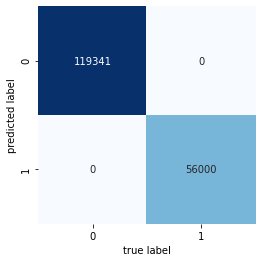

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Normal'], yfit_normal)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Generic attacks prediction in test set

In [ ]:
%%time
yfit_generic = model_generic.predict(real_data)

CPU times: user 15.7 s, sys: 104 ms, total: 15.8 s
Wall time: 15.6 s


In [ ]:
print(classification_report(real_y['attack_cat_Generic'], yfit_generic))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    135341
           1       0.99      0.98      0.99     40000

    accuracy                           0.99    175341
   macro avg       0.99      0.99      0.99    175341
weighted avg       0.99      0.99      0.99    175341



Text(91.68, 0.5, 'predicted label')

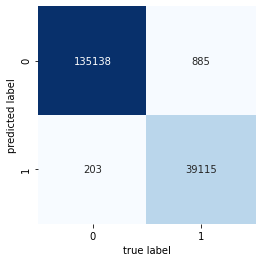

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Generic'], yfit_generic)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Exploits attacks prediction in test set

In [ ]:
%%time
yfit_exploits = model_exploits.predict(real_data)

CPU times: user 1min 14s, sys: 124 ms, total: 1min 14s
Wall time: 1min 14s


In [ ]:
print(classification_report(real_y['attack_cat_Exploits'], yfit_exploits))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86    141948
           1       0.49      0.99      0.65     33393

    accuracy                           0.80    175341
   macro avg       0.74      0.87      0.76    175341
weighted avg       0.90      0.80      0.82    175341



Text(91.68, 0.5, 'predicted label')

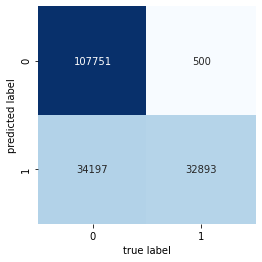

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Exploits'], yfit_exploits)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

A primera vista podría parecer que las métricas obtenidas para el caso del ataque *Exploit* no son buenas para un modelo en producción. No obstante, nótese que a pesar de que se producirán varias alertas de ataques de este tipo cuando en realidad no lo son, casi la totalidad de los ataques reales sí son clasificados como tal. Generar alertas cuando no hay ataques realmente no es tan grave, no clasificar los ataques reales sí lo sería.  

### Fuzzers attacks prediction in test set

In [ ]:
%%time
yfit_fuzzers = model_fuzzers.predict(real_data)

CPU times: user 1min 12s, sys: 98.9 ms, total: 1min 12s
Wall time: 1min 12s


In [ ]:
print(classification_report(real_y['attack_cat_Fuzzers'], yfit_fuzzers))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83    157157
           1       0.28      0.99      0.44     18184

    accuracy                           0.74    175341
   macro avg       0.64      0.85      0.64    175341
weighted avg       0.92      0.74      0.79    175341



Text(91.68, 0.5, 'predicted label')

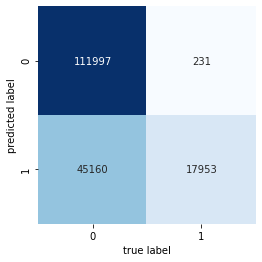

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Fuzzers'], yfit_fuzzers)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### DoS attacks prediction in test set

In [ ]:
%%time
yfit_dos = model_dos.predict(real_data)

CPU times: user 1min 43s, sys: 111 ms, total: 1min 43s
Wall time: 1min 43s


In [ ]:
print(classification_report(real_y['attack_cat_DoS'], yfit_dos))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88    163077
           1       0.25      0.93      0.39     12264

    accuracy                           0.80    175341
   macro avg       0.62      0.86      0.64    175341
weighted avg       0.94      0.80      0.85    175341



Text(91.68, 0.5, 'predicted label')

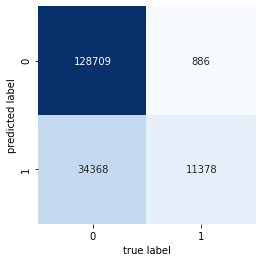

In [ ]:
mat = confusion_matrix(real_y['attack_cat_DoS'], yfit_dos)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Reconnaissance attacks prediction in test set

In [ ]:
%%time
yfit_reconnaissance = model_reconnaissance.predict(real_data)

CPU times: user 1min 21s, sys: 114 ms, total: 1min 21s
Wall time: 1min 21s


In [ ]:
print(classification_report(real_y['attack_cat_Reconnaissance'], yfit_reconnaissance))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91    164850
           1       0.25      0.83      0.39     10491

    accuracy                           0.84    175341
   macro avg       0.62      0.84      0.65    175341
weighted avg       0.94      0.84      0.88    175341



Text(91.68, 0.5, 'predicted label')

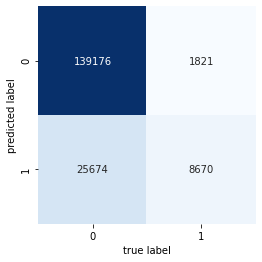

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Reconnaissance'], yfit_reconnaissance)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Analysis attacks prediction in test set

In [ ]:
%%time
yfit_analysis = model_analysis.predict(real_data)

CPU times: user 43.4 s, sys: 106 ms, total: 43.5 s
Wall time: 43.3 s


In [ ]:
print(classification_report(real_y['attack_cat_Analysis'], yfit_analysis))

              precision    recall  f1-score   support

           0       1.00      0.85      0.91    173341
           1       0.05      0.70      0.09      2000

    accuracy                           0.84    175341
   macro avg       0.52      0.77      0.50    175341
weighted avg       0.99      0.84      0.91    175341



Text(91.68, 0.5, 'predicted label')

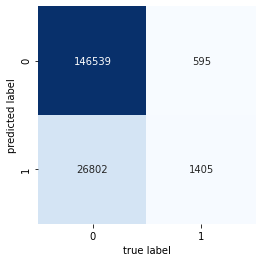

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Analysis'], yfit_analysis)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Backdoor attacks prediction in test set

In [ ]:
%%time
yfit_backdoor = model_backdoor.predict(real_data)

CPU times: user 1min 11s, sys: 106 ms, total: 1min 11s
Wall time: 1min 11s


In [ ]:
print(classification_report(real_y['attack_cat_Backdoor'], yfit_backdoor))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    173595
           1       0.05      0.83      0.09      1746

    accuracy                           0.84    175341
   macro avg       0.52      0.83      0.50    175341
weighted avg       0.99      0.84      0.91    175341



Text(91.68, 0.5, 'predicted label')

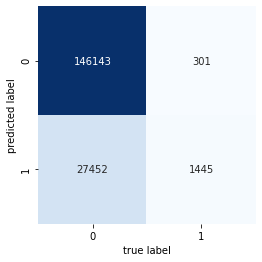

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Backdoor'], yfit_backdoor)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Shellcode attacks prediction in test set

In [ ]:
%%time
yfit_shellcode = model_shellcode.predict(real_data)

CPU times: user 40.2 s, sys: 104 ms, total: 40.3 s
Wall time: 40.1 s


In [ ]:
print(classification_report(real_y['attack_cat_Shellcode'], yfit_shellcode))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    174208
           1       0.04      1.00      0.08      1133

    accuracy                           0.86    175341
   macro avg       0.52      0.93      0.50    175341
weighted avg       0.99      0.86      0.92    175341



Text(91.68, 0.5, 'predicted label')

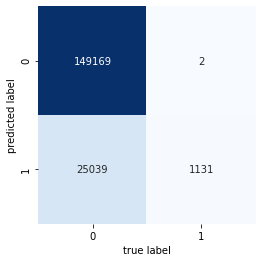

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Shellcode'], yfit_shellcode)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Worms Attacks prediction in test set

In [ ]:
%%time
yfit_worms = model_worms.predict(real_data)

CPU times: user 35.5 s, sys: 107 ms, total: 35.6 s
Wall time: 35.4 s


In [ ]:
print(classification_report(real_y['attack_cat_Worms'], yfit_worms))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    175211
           1       0.01      0.95      0.01       130

    accuracy                           0.89    175341
   macro avg       0.50      0.92      0.48    175341
weighted avg       1.00      0.89      0.94    175341



Text(91.68, 0.5, 'predicted label')

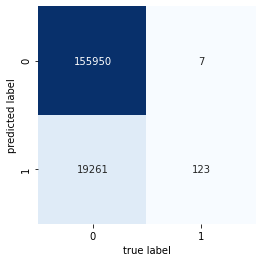

In [ ]:
mat = confusion_matrix(real_y['attack_cat_Worms'], yfit_worms)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Podemos ver que para los tipos de ataques de los cuales se tenían menos instancias, el modelo predictivo tiene grandes falencias en la precisión, no logra identificar cuando no existe un ataque, pero, al creer que sí hay ataques en casos en los que no, al ser tan pocas instancias de los ataques de esos tipos, el recall sobre estos ataques es muy alto.